In [145]:
import sklearn
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing






In [146]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
X['target'] = diabetes.target
print(X.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


# Наявність пропусків і заміна

In [147]:
print(X.isnull().sum())

X.fillna(X.mean(), inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


# Видалення дублікатів

In [148]:
print(f"Кількість дублікатів: {X.duplicated().sum()}")

# Видалення дублікатів
X.drop_duplicates(inplace=True)

Кількість дублікатів: 0


In [149]:
print(X['sex'].unique())


[ 0.05068012 -0.04464164]


# Заміна бінарних ознак


In [150]:
X.info()
X['sex'] = X['sex'].astype(str)
X.sex.unique()
X['sex'] = X['sex'].map({'0.05068011873981862': 1, '-0.044641636506989144': 0})






<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 41.4 KB


# Перевірка типу даних

In [151]:
X.info()
X.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    int64  
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 41.4 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Обчислити кореляцію між прогресом діабету і іншмим ознаками.
# Розташувати в порядку спадання. 
# Побудувати теплову карту кореляції. 

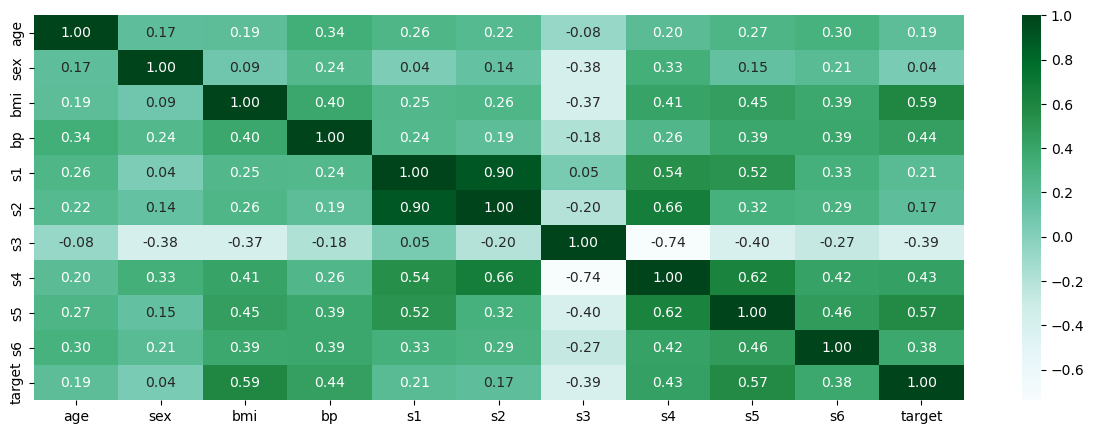

s2  s1    0.896663
s1  s2    0.896663
s2  s4    0.659817
s4  s2    0.659817
    s5    0.617859
dtype: float64
Корреляція зі змінною target 
s3       -0.394789
sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441482
s5        0.565883
bmi       0.586450
target    1.000000
Name: target, dtype: float64


In [152]:
cor_diabetes = X.corr()
plt.figure(figsize = (15, 5))
sns.heatmap(data = cor_diabetes, annot = True, cmap = "BuGn", cbar = True, fmt='.2f')
plt.show()
peak_corr = cor_diabetes.unstack().sort_values(ascending = False)
peak_corr = peak_corr[peak_corr < 1].head(5)

print(peak_corr)
print(f"Корреляція зі змінною target \n{cor_diabetes['target'].sort_values()}")

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = ['target']), X['target'], test_size = 0.2, random_state = 42)

display(X_train.head(), y_train.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,1,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,1,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,0,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,0,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,0,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

# Масштабувати ознаки

In [154]:
scale = StandardScaler()
X_train_scaled = pd.DataFrame(scale.fit_transform(X_train), columns = X_train.columns)
X_test_scaled  = pd.DataFrame(scale.transform(X_test), columns = X_train.columns)

# Поділити на тренувальну та тестову вибірки
# Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число)
# Вивести коефіцієнт детермінації і середньоквадратичну помилку. 


In [155]:
def elinear_regression(y_train, y_test, y_train_pred, y_test_pred):
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss  = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)

    return train_loss, test_loss, r2_train, r2_test


model_lin = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred_lin = model_lin.predict(X_train_scaled)
y_test_pred_lin = model_lin.predict(X_test_scaled)

train_loss_lin, test_loss_lin, r2_train_lin, r2_test_lin = elinear_regression(y_train, y_test, y_train_pred_lin, y_test_pred_lin)

print(f'помилка на тренувальному наборі даних: {round(train_loss_lin, 2)}')
print(f'помилка на тестувальному наборі даних: {round(test_loss_lin, 2)}')
print(f'\nкоеф. детермінації (R²) на тренувальному наборі даних: {round(r2_train_lin, 2)}')
print(f'коеф. детермінації (R²) на тестувальному наборі даних: {round(r2_test_lin, 2)}')

помилка на тренувальному наборі даних: 2868.55
помилка на тестувальному наборі даних: 2900.19

коеф. детермінації (R²) на тренувальному наборі даних: 0.53
коеф. детермінації (R²) на тестувальному наборі даних: 0.45


In [156]:
rf_mod = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1)
rf_mod.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_mod.predict(X_train_scaled)
y_test_pred_rf = rf_mod.predict(X_test_scaled)

train_loss_rf, test_loss_rf, r2_train_rf, r2_test_rf = elinear_regression(y_train, y_test, y_train_pred_rf, y_test_pred_rf)

print(f'помилка на тренувальному наборі даних: {round(train_loss_rf, 2)}')
print(f'помилка на тестувальному наборі даних: {round(test_loss_rf, 2)}')
print(f'\nкоеф. детермінації (R²) на тренувальному наборі даних: {round(r2_train_rf, 2)}')
print(f'коеф. детермінації (R²) на тестувальному наборі даних: {round(r2_test_rf, 2)}')

помилка на тренувальному наборі даних: 460.29
помилка на тестувальному наборі даних: 2959.18

коеф. детермінації (R²) на тренувальному наборі даних: 0.92
коеф. детермінації (R²) на тестувальному наборі даних: 0.44


# Побудувати графіки

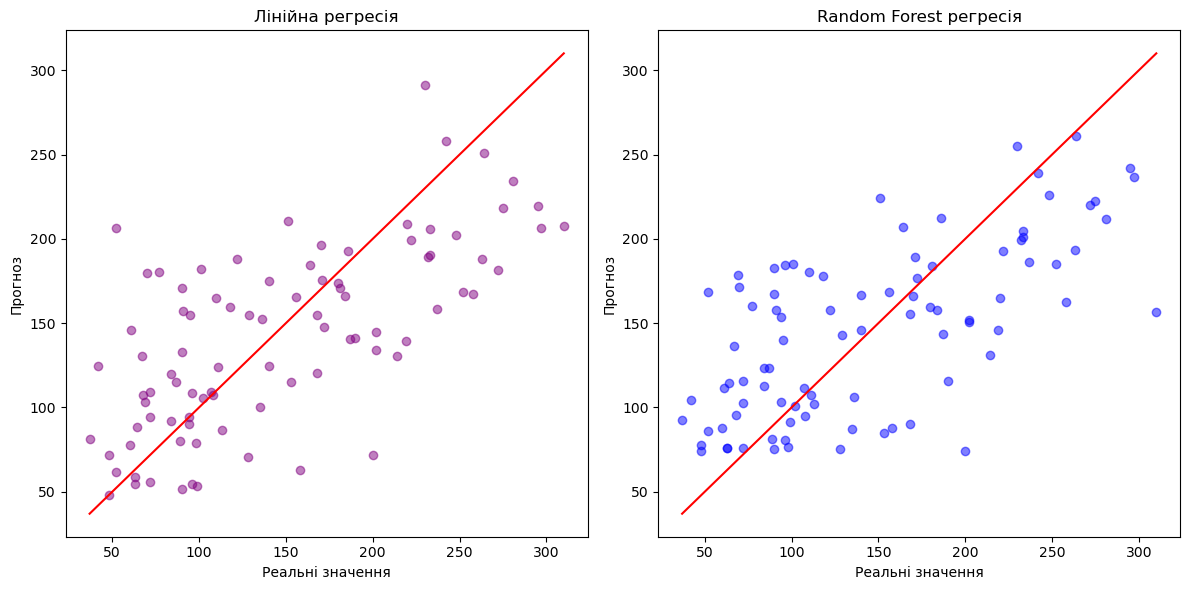

In [157]:
def plt_pred(y, y_pred_lin, y_pred_rf):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y, y_pred_lin, color = 'purple', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.title("Лінійна регресія")
    plt.xlabel("Реальні значення")
    plt.ylabel("Прогноз")

    plt.subplot(1, 2, 2)
    plt.scatter(y, y_pred_rf, color = 'blue', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.title("Random Forest регресія")
    plt.xlabel("Реальні значення")
    plt.ylabel("Прогноз")

    plt.tight_layout()
    plt.show()

plt_pred(y_test, y_test_pred_lin, y_test_pred_rf)

# Вивести справжні і прогнозовані значення.

In [158]:
comparison = pd.DataFrame({'Реальні значення': y_test, 
                           'Спрогнозовані значення (Лінеар)': y_test_pred_lin, 
                           'Спрогнозовані значення (Random Forest)': y_test_pred_rf})
display(comparison.head(15))

,Реальні значення,Спрогнозовані значення (Лінеар),Спрогнозовані значення (Random Forest)
287,219.0,139.547558,146.21
211,70.0,179.517208,171.58
72,202.0,134.038756,150.62
321,230.0,291.417029,255.12
73,111.0,123.789659,107.19
418,84.0,92.172347,123.54
367,242.0,258.232389,239.30
354,272.0,181.337321,220.00
281,94.0,90.224113,153.42
148,96.0,108.633759,184.78


## Висновки до 1 завдання
Можна зробити наступні висновки
Обидві моделі виявляють значну середньоквадратичну похибку на тестових даних, що свідчить про їхню низьку точність у прогнозуванні.
Лінійна регресія не показала задовільних результатів ні на тренувальному, ні на тестовому наборах, що свідчить
про її обмежені можливості для вирішення даної задачі.
Значення коефіцієнта детермінації R² для обох
моделей на тестових даних значно відрізняються від очікуваного,є розбіжності
Графіки показують істотні розбіжності між фактичними та прогнозованими значеннями, що потребує знаходження нової моделі


In [160]:
california_housing = fetch_california_housing()
data = california_housing.data
target = california_housing.target
cali = pd.DataFrame(data, columns=california_housing.feature_names)
cali['target'] = target


print(cali.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


# Провести попередній аналіз

In [161]:
cali.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [162]:
cali.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [163]:
X = cali.drop(columns=['MedInc'])
y = cali['MedInc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабувати ознаки, поділити на тренувальну та тестову вибірки

In [164]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [169]:
print("Масштабовані дані тренувальної вибірки:")
print(X_train_scaled.head())
print("\Масштабовані дані тестової вибірки:")
print(X_test_scaled.head())

Масштабовані дані тренувальної вибірки:
       HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
8267   1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
17445 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
14265  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
2271   1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

       Longitude    target  
14196   1.272587 -0.901189  
8267    0.709162  1.512771  
17445  -0.447603 -0.299213  
14265   1.232698 -0.984220  
2271   -0.108551 -0.957408  
\Масштабовані дані тестової вибірки:
       HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046 -0.286324 -0.520686  -0.171746   -0.030301  0.067408  0.195100   
3024   0.110435 -0.165815   0.223472    0.121851 -0.036030 -0.235491   
15663  1.856173 -0.610765   0.205892   -0.102419 -0.149989  1.009478   
20484 -0.921138  0.305115  -

# Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.

In [166]:

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [168]:
rf_input = {
    'n_estimators': [100, 50],
    'max_depth': [10, 20]
}
rdf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rdf, rf_input, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 50]},
             scoring='neg_mean_squared_error')

In [170]:
ridge_input = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky']
}

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_input, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_squared_error')

In [171]:
def mod(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")
    return y_pred

In [172]:
lr_predicted = mod(regression, X_test_scaled, y_test, "Linear Regression")


Linear Regression - MSE: 50.41, R2: -13.24


# Підібрати оптимальні параметри за допомогою GridSeach.
# Вивести R2      і      MSE.

In [186]:
best_rdf = rf_grid.best_estimator_
rf_predicted = mod(best_rdf, X_test_scaled, y_test, "Random Forest")
print("Best parameters Random Forest", rf_grid.best_params_)

Random Forest - MSE: 0.64, R2: 0.82
Best parameters Random Forest {'max_depth': 20, 'n_estimators': 100}


In [185]:
best_ridge = ridge_grid.best_estimator_
ridge_predicted = mod(best_ridge, X_test_scaled, y_test, "Ridge Regression")
print("Best parameters Ridge", ridge_grid.best_params_)

Ridge Regression - MSE: 1.10, R2: 0.69
Best parameters Ridge {'alpha': 10.0, 'solver': 'auto'}


# Побудувати графіки

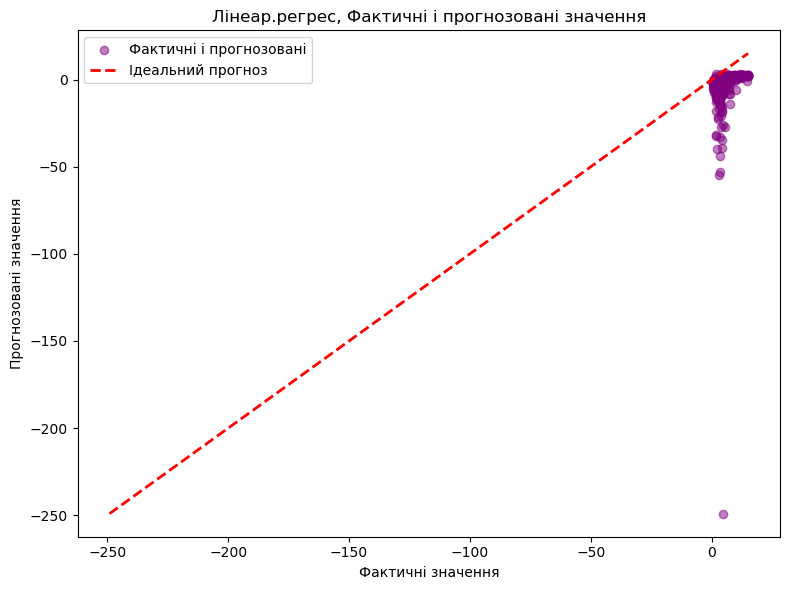

In [179]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, lr_predicted, color='purple', alpha=0.5, label='Фактичні і прогнозовані')

min_val = min(y_test.min(), lr_predicted.min())
max_val = max(y_test.max(), lr_predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ідеальний прогноз')

plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінеар.регрес, Фактичні і прогнозовані значення')
plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

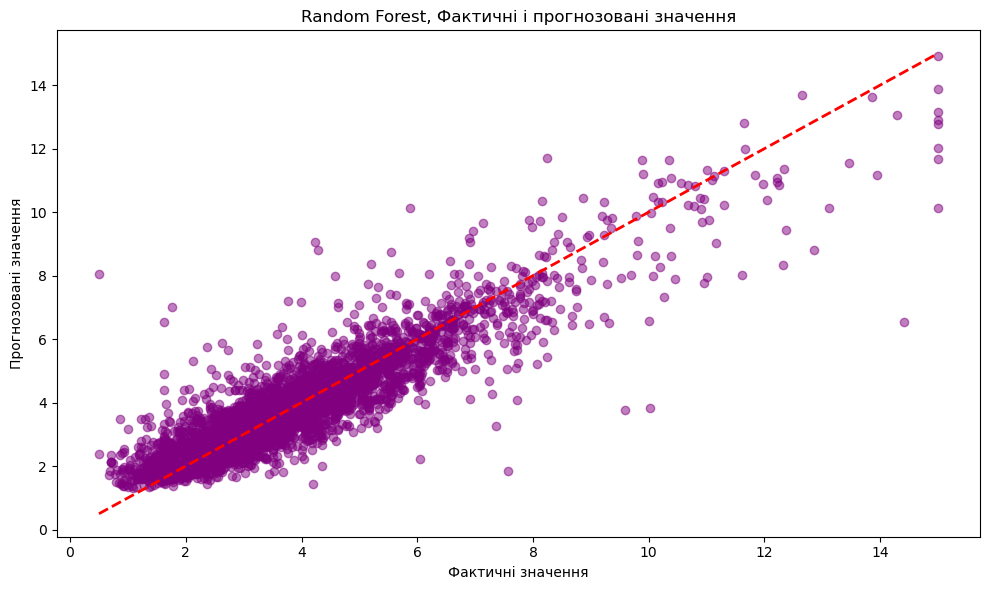

In [181]:
y_pred = rf_grid.best_estimator_.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Random Forest, Фактичні і прогнозовані значення')

plt.tight_layout()
plt.show()

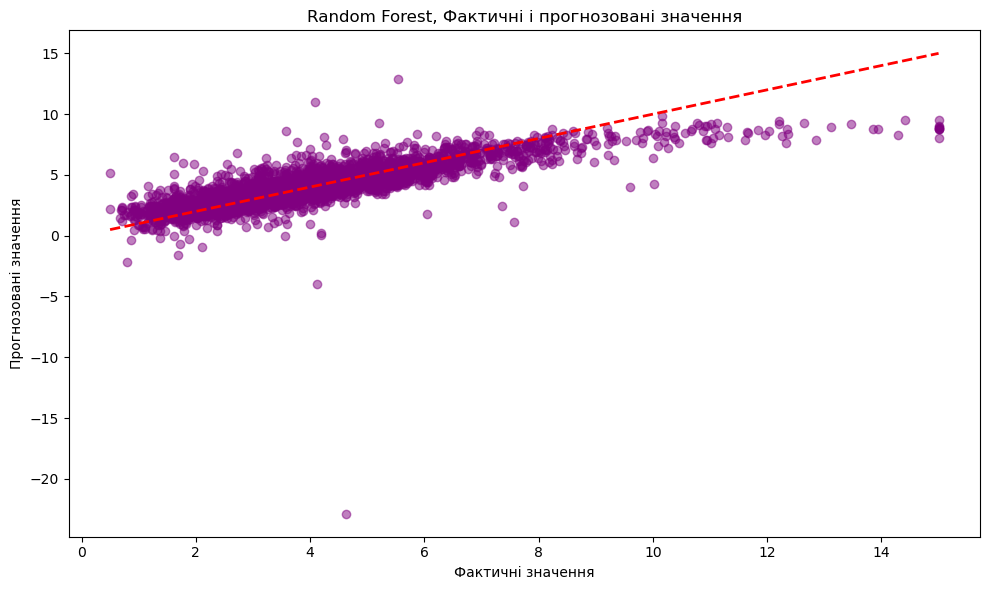

In [182]:
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Random Forest, Фактичні і прогнозовані значення')

plt.tight_layout()
plt.show()

# Вивести справжні і прогнозовані значення. 

In [183]:
print('Справжні значення: ', y_test)


Справжні значення:  20046    1.6812
3024     2.5313
15663    3.4801
20484    5.7376
9814     3.7250
          ...  
15362    4.6050
16623    2.7266
18086    9.2298
2144     2.7850
3665     3.5521
Name: MedInc, Length: 4128, dtype: float64


In [184]:
print('Спрогнозовані значення лінійної моделі:\n', lr_predicted ,'\n')

print('Спрогнозовані значення Random Forest:\n', rf_predicted,'\n')

print('Спрогнозовані значення Ridge:\n', ridge_predicted,'\n')

Спрогнозовані значення лінійної моделі:
 [-2.39299379 -3.57574791 -0.78995723 ...  2.40556819 -1.54783958
 -1.76479684] 

Спрогнозовані значення Random Forest:
 [1.70478295 1.8073585  4.426143   ... 9.281822   2.89599087 2.63332749] 

Спрогнозовані значення Ridge:
 [1.90910007 1.94032542 4.345101   ... 8.21156737 2.90473718 2.80063952] 



# Висновки до 2 завдання
Було проаналізовано California housing dataset з пакету Scikit-learn. Середньоквадратична похибка в нормі крім лінійної регресії, вона має значні розбіжності у фактичними та прогнозованими значеннями. від'ємне значення коєфіціента детермінації говорить про те, що модель лінійної регресії не підходить для опису даних.